<a href="https://colab.research.google.com/github/951237/TIL/blob/master/201025_TIL_%EB%8F%84%EC%84%9C%EB%8C%80%EC%97%AC%ED%98%84%ED%99%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import csv
import matplotlib.pyplot as plt

## 코랩 한글 설정


In [9]:
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)



# 우선 fm._rebuild() 를 해주고
fm._rebuild()

#폰트 크기 변경
plt.rcParams.update({'font.size': 20})
# plt.rcParams["axes.labelsize"] = 

NanumGothic Eco


In [2]:
PATH_FILE = '/content/drive/My Drive/data/학현초_도서관 대출관련_200922/이용자별대출통계2017-2020.csv'

## 교사가 가장 책을 빌린 시기

In [61]:
# 파일 불러오기
f = open(PATH_FILE)
data = csv.reader(f)

# 헤더 날리기
for i in range(4):
    next(data)

## 교사가 가장 책을 많이 빌렸을 때
mx = -10
mx_date = ''
for row in data:
    row[1] = int(row[1])
    if row[1] > mx:
        mx_date = row[0]
        mx = row[1]
f.close()

print(mx_date, mx)


2019.1.9 147


## 각 클래스별로 가장 많이 책을 빌린 날짜와 권수를 출력

In [60]:
# 각 클래스별로 책을 가장 많이 빌린 날짜 출력
dic_class = {"교사" : 1, "1학년" : 2, "2학년" : 3, "3학년" : 4, "4학년" : 5, "5학년" : 6, "6학년" : 7, "학부모" : 8, "지역주민" : 9}

def mx_book(k, v):
    f = open(PATH_FILE)
    data = csv.reader(f)

    # 헤더 날리기
    for i in range(4):
        next(data)
    mx = -10
    mx_date = ''
    for row in data:
        row[v] = int(row[v])
        if row[v] > mx:
            mx_date = row[0]
            mx = row[v]
    f.close()
    print(f"{k}는 {mx_date}에, {mx}권을 가장 많이 대여했습니다.")

for k, v in dic_class.items():
    mx_book(k,v)


교사는 2019.1.9에, 147권 가장 많이 대여했습니다.
1학년는 2017.3.24에, 120권 가장 많이 대여했습니다.
2학년는 2017.4.17에, 72권 가장 많이 대여했습니다.
3학년는 2017.4.18에, 75권 가장 많이 대여했습니다.
4학년는 2019.9.5에, 67권 가장 많이 대여했습니다.
5학년는 2019.3.8에, 70권 가장 많이 대여했습니다.
6학년는 2017.4.19에, 55권 가장 많이 대여했습니다.
학부모는 2018.6.20에, 11권 가장 많이 대여했습니다.
지역주민는 2017.3.4에, 0권 가장 많이 대여했습니다.


## 월별 도서대여 현황 시각화

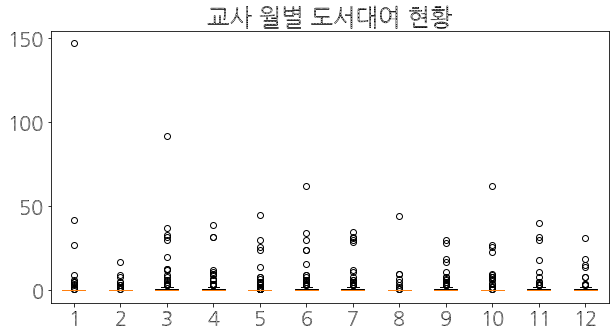

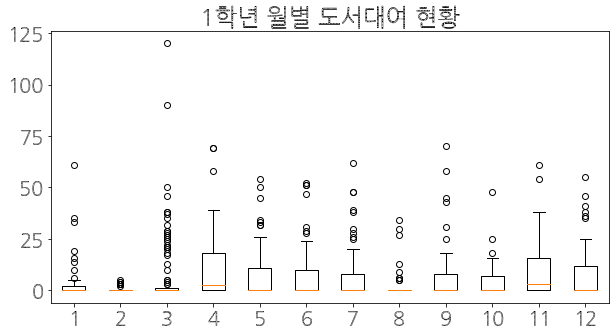

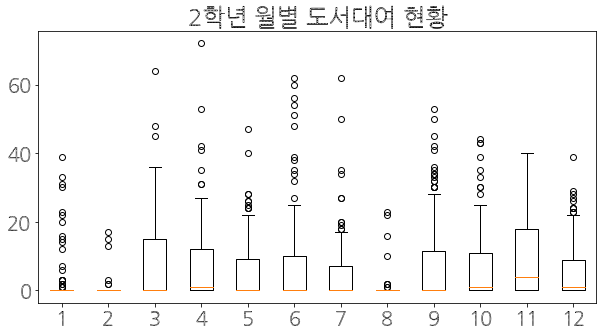

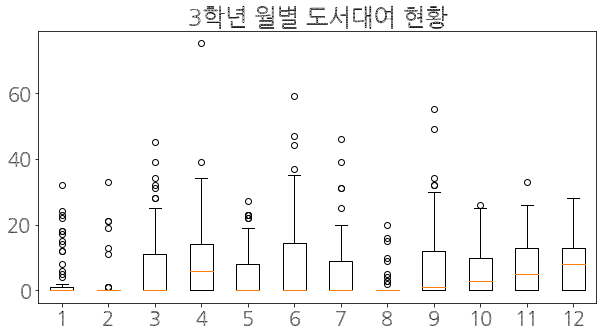

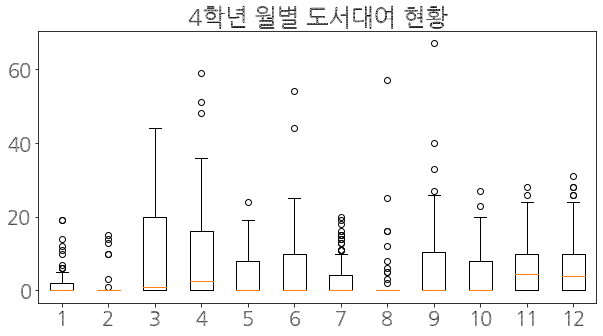

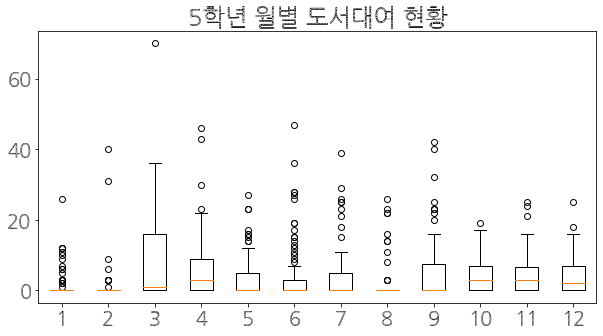

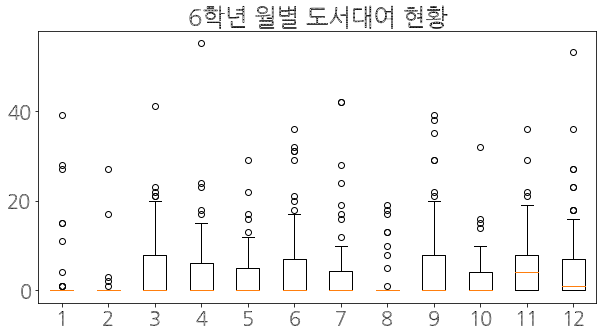

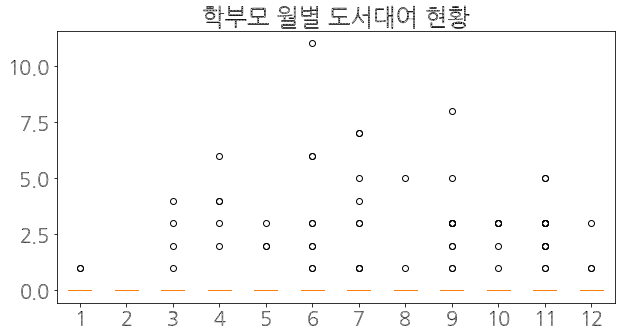

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


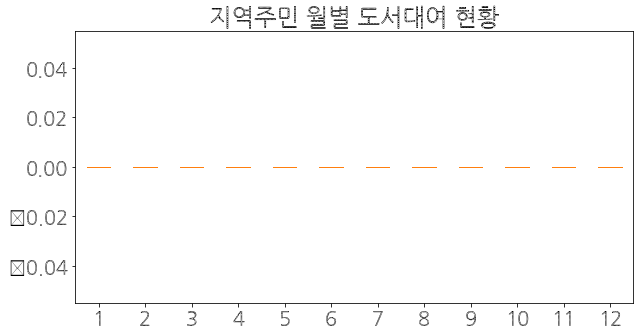

In [12]:
# 각 클래스별로 책을 가장 많이 빌린 날짜 출력
dic_class = {"교사" : 1, "1학년" : 2, "2학년" : 3, "3학년" : 4, "4학년" : 5, "5학년" : 6, "6학년" : 7, "학부모" : 8, "지역주민" : 9}
for k, v in dic_class.items():

    # 파일 불러오기
    f = open(PATH_FILE)
    data = csv.reader(f)

    # 헤더 날리기
    for i in range(4):
        next(data)

    month = []
    for i in range(12):
        month.append([])

    for row in data:
        month[int(row[0].split('.')[1])-1].append(int(row[v]))

    plt.figure(figsize=(10,5))
    plt.title(f'{k} 월별 도서대여 현황')
    plt.boxplot(month)
    plt.show()

## 날짜별 도서대여현황


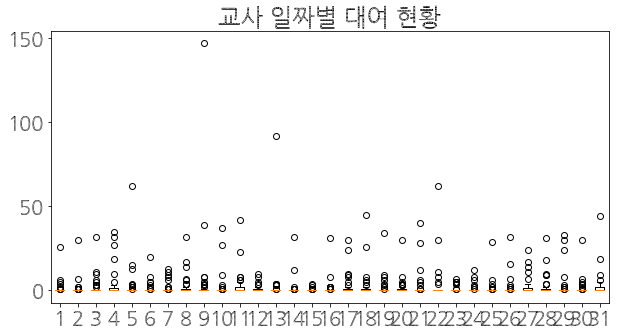

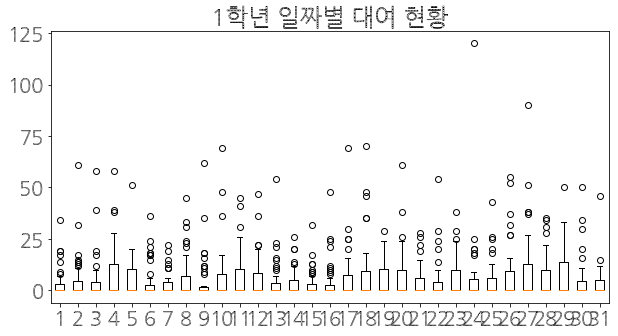

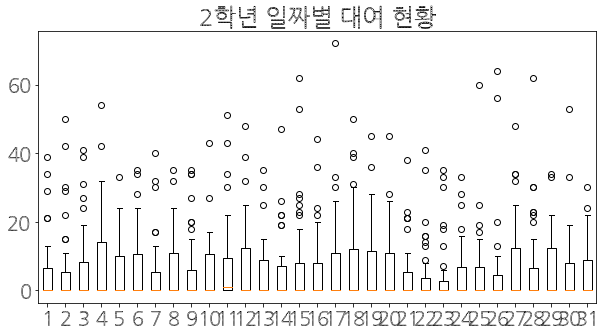

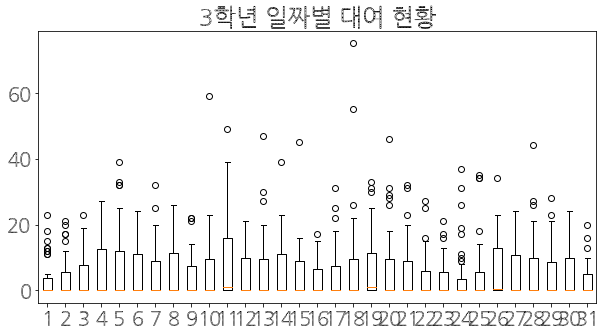

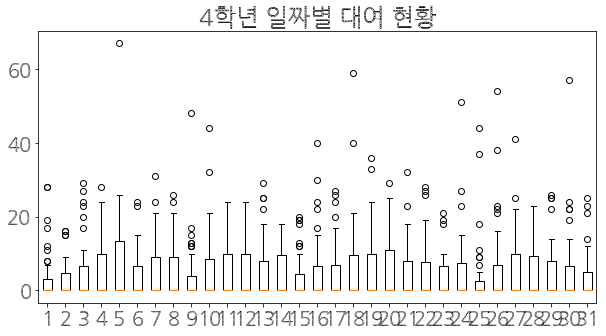

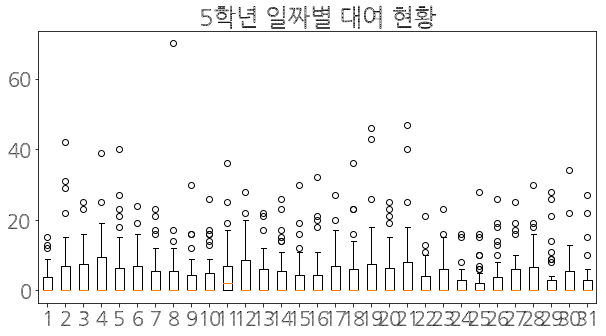

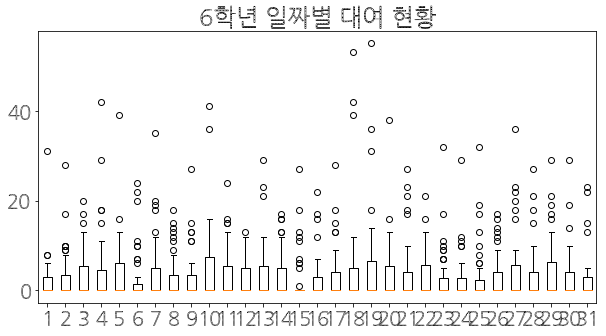

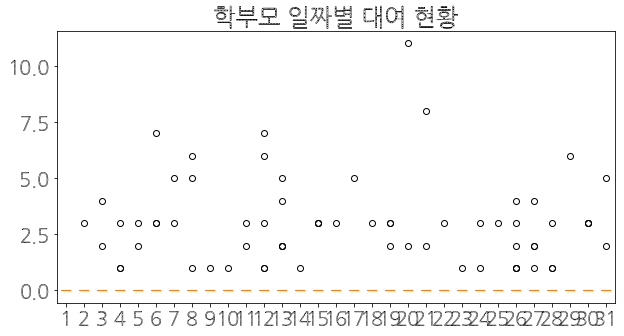

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


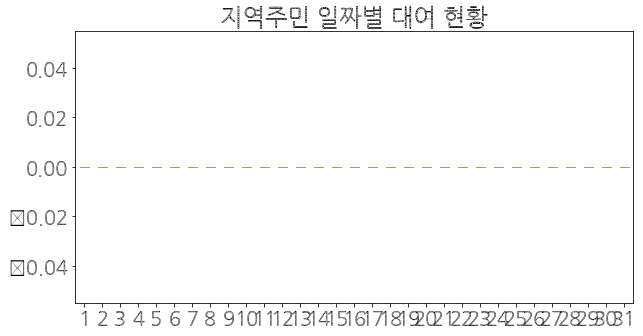

In [33]:
# 각 클래스별로 책을 가장 많이 빌린 날짜 출력
dic_class = {"교사" : 1, "1학년" : 2, "2학년" : 3, "3학년" : 4, "4학년" : 5, "5학년" : 6, "6학년" : 7, "학부모" : 8, "지역주민" : 9}
for k, v in dic_class.items():
    # 파일 불러오기
    f = open(PATH_FILE)
    data = csv.reader(f)

    # 헤더 날리기
    for i in range(4):
        next(data)

    month = []
    for i in range(31):
        month.append([])

    for row in data:
        month[int(row[0].split('.')[2])-1].append(int(row[v]))

    plt.figure(figsize=(10,5))
    plt.boxplot(month)
    plt.title(f'{k} 일짜별 대여 현황')
    plt.show()

## 연도별 도서대여 현황 추이

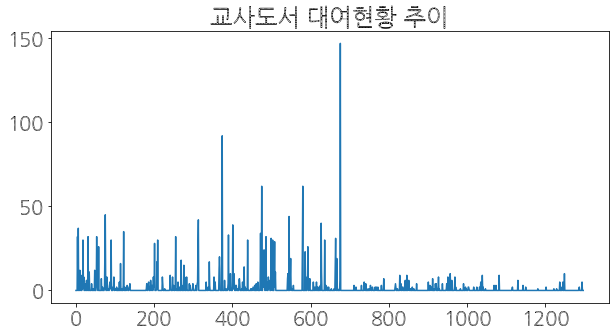

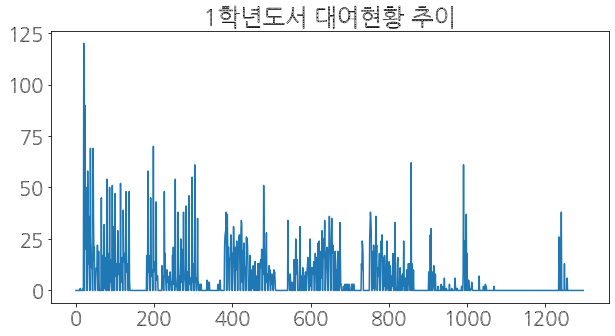

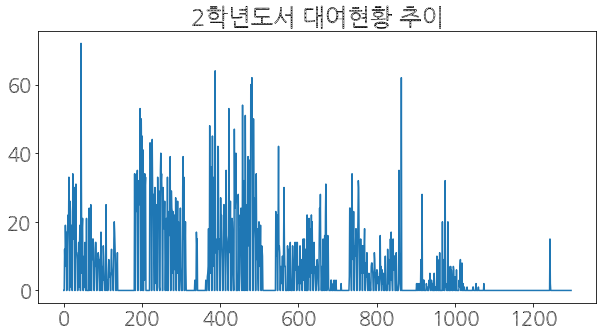

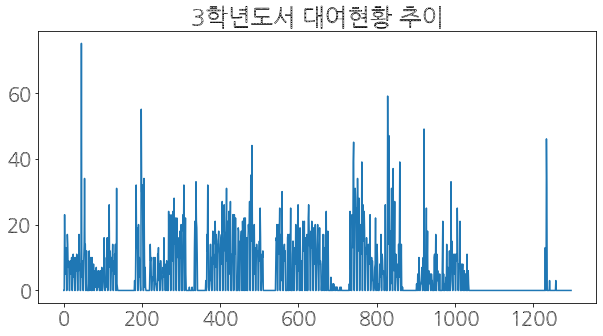

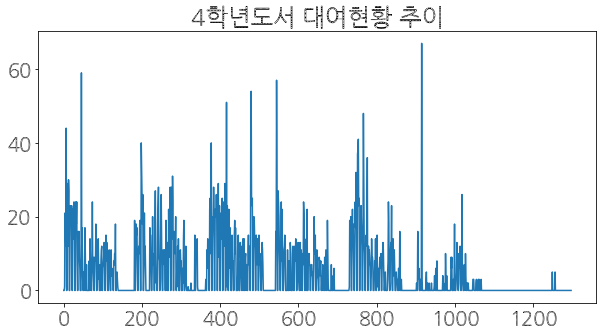

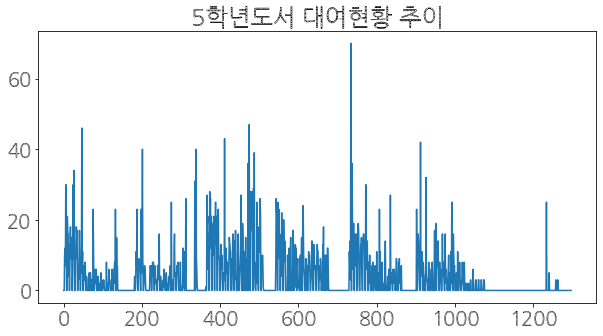

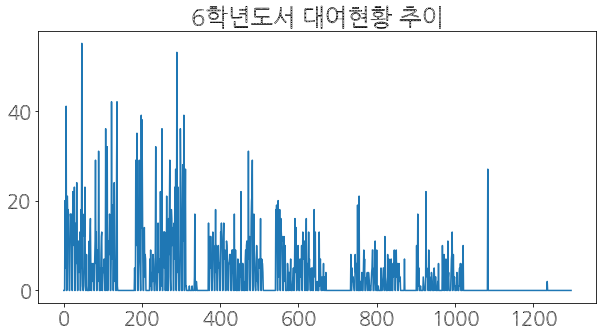

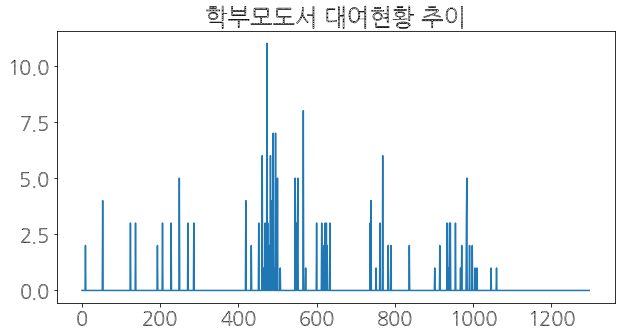

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


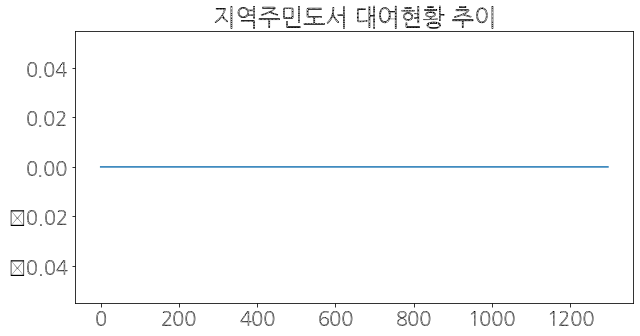

In [34]:
for k, v in dic_class.items():
    # 파일 불러오기
    f = open(PATH_FILE)
    data = csv.reader(f)

    # 헤더 날리기
    for i in range(4):
        next(data)

    result = []

    for row in data:
        i = int(row[v])
        result.append(i)

    plt.figure(figsize=(10,5))
    plt.title(f'{k}도서 대여현황 추이')
    plt.plot(result)
    plt.show()

## 도서대출 현황 추이 그래프로 표현

In [38]:
import pandas as pd


In [40]:
df_result = []
for k, v in dic_class.items():
    # 파일 불러오기
    f = open(PATH_FILE)
    data = csv.reader(f)

    # 헤더 날리기
    for i in range(4):
        next(data)

    result = []

    for row in data:
        i = int(row[v])
        result.append(i)
    
    df_result.append(result)

    # plt.figure(figsize=(10,5))
    # plt.title(f'{k}도서 대여현황 추이')
    # plt.plot(result)
    # plt.show()

In [ ]:
df_result

## 각 클래스별로 책을 대여한 권수 시각화
- 파일 읽기
- 한 행을 읽으며 

In [62]:
import pandas as pd

In [43]:
df = pd.read_csv(PATH_FILE, header=1)
df

,년/월/일,교사,1학년,2학년,3학년,4학년,5학년,6학년,학부모,지역주민,기타,소계
0,2017.3.2,1,0,2,0,0,0,0,0,0,0,3
1,2017.3.3,4,1,14,17,5,12,0,0,0,0,53
2,2017.3.4,0,0,0,0,0,0,0,0,0,0,0
3,2017.3.5,0,0,0,0,0,0,0,0,0,0,0
4,2017.3.6,0,0,12,23,1,10,0,0,0,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,2020.9.17,0,0,0,0,0,0,0,0,0,0,0
1296,2020.9.18,5,0,0,0,0,0,0,0,0,0,5
1297,2020.9.19,0,0,0,0,0,0,0,0,0,0,0
1298,2020.9.20,0,0,0,0,0,0,0,0,0,0,0


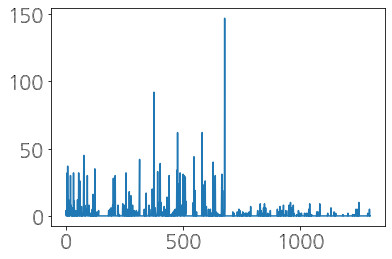

In [48]:
df['교사'].plot.line()

# 코딩연습장

In [69]:
df.columns

Index(['년/월/일', '교사', '1학년', '2학년', '3학년', '4학년', '5학년', '6학년', '학부모', '지역주민',
       '기타', '소계'],
      dtype='object')

In [75]:
df.loc[df['교사'].str.split('.')[1] == '2017']

AttributeError: ignored

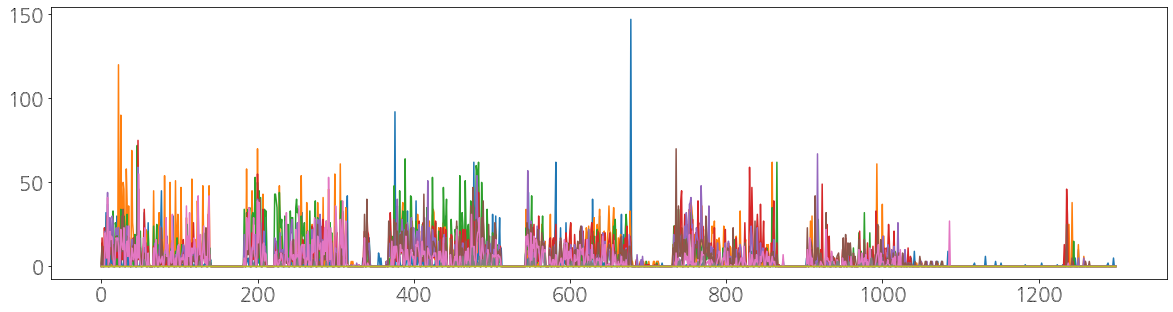

In [72]:
lst_col = ['교사', '1학년', '2학년', '3학년', '4학년', '5학년', '6학년', '학부모', '지역주민']
plt.figure(figsize=(20,5))    
for col in lst_col: 
    plt.plot(df[col], linestyle='-')
plt.show()

In [33]:
for row in data:
    print(row)